In [27]:
import torch
import os
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn import preprocessing

import matplotlib.pyplot as plt
from matplotlib import cm, colors

In [2]:
with open("../dataset/fpt_filtered_raw.txt", "r") as f:
    data = f.readlines()
data = [line.split("|")[0] for line in data]

In [3]:
DATA_ROOT = "../dataset"

In [4]:
embeddings = []
for file in data:
    file_path = os.path.join(DATA_ROOT, file.replace(".wav", ".emb.pt"))
    embed = torch.load(file_path)
    embed = embed.numpy()
    embeddings.append(embed)

In [5]:
embeddings = np.array(embeddings)

In [6]:
embeddings.shape

(25921, 512)

In [7]:
sum_arr = np.sum(embeddings, axis=-1)

In [8]:
clean_embeddings = embeddings[~np.isnan(sum_arr)]

In [17]:
tsne = TSNE(2, verbose=1, metric="cosine")
tsne_proj = tsne.fit_transform(clean_embeddings)

/home/vtcai/anaconda3/envs/voice/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/vtcai/anaconda3/envs/voice/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 25918 samples in 0.016s...
[t-SNE] Computed neighbors for 25918 samples in 9.563s...
[t-SNE] Computed conditional probabilities for sample 1000 / 25918
[t-SNE] Computed conditional probabilities for sample 2000 / 25918
[t-SNE] Computed conditional probabilities for sample 3000 / 25918
[t-SNE] Computed conditional probabilities for sample 4000 / 25918
[t-SNE] Computed conditional probabilities for sample 5000 / 25918
[t-SNE] Computed conditional probabilities for sample 6000 / 25918
[t-SNE] Computed conditional probabilities for sample 7000 / 25918
[t-SNE] Computed conditional probabilities for sample 8000 / 25918
[t-SNE] Computed conditional probabilities for sample 9000 / 25918
[t-SNE] Computed conditional probabilities for sample 10000 / 25918
[t-SNE] Computed conditional probabilities for sample 11000 / 25918
[t-SNE] Computed conditional probabilities for sample 12000 / 25918
[t-SNE] Computed conditional probabilities for sam

In [18]:
with open("fpt_embed.npy", "wb") as f:
    np.save(f, tsne_proj)

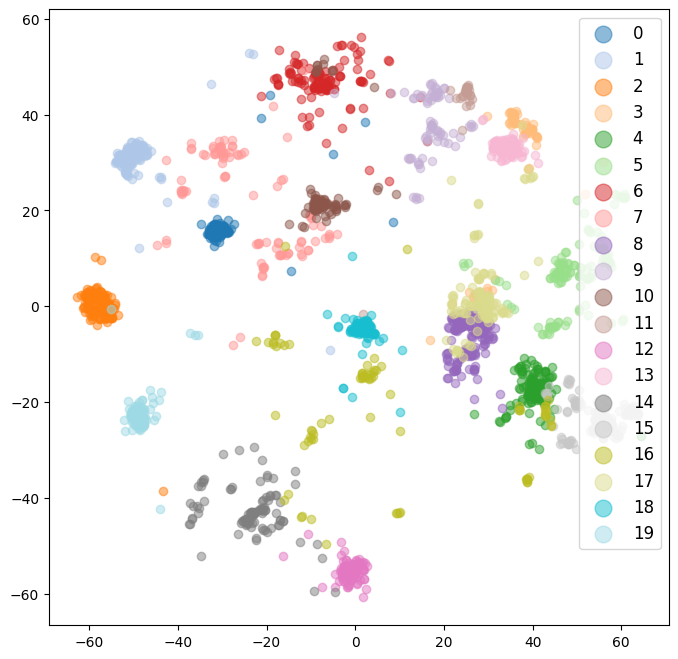

In [40]:
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 10
# norm=plt.Normalize(0, num_categories)
# cmap = colors.LinearSegmentedColormap.from_list("", ["red","yellow","orange", "blue", "green"])
for lab in range(0, 20):
    indices = test_predictions==(lab+40)
    ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
ax.legend(fontsize='large', markerscale=2)
plt.show()

In [28]:
norm_embed = preprocessing.normalize(clean_embeddings)

In [29]:
kmeans = KMeans(n_clusters=260, random_state=0).fit(norm_embed)

In [30]:
test_predictions = kmeans.predict(norm_embed)

In [31]:
test_predictions

array([ 26, 249, 117, ...,  22,  22,  52], dtype=int32)

In [57]:
with open("../dataset/fpt_filtered_raw.txt.cleaned", "r") as f:
    raw_data = f.readlines()

In [58]:
cleaned_data = []
for i, elem in enumerate(sum_arr):
    if np.isnan(elem):
        continue
    cleaned_data.append(raw_data[i])

In [59]:
len(cleaned_data)

25918

In [60]:
with open("../dataset/fpt_labeled_spkr.txt.cleaned", "w") as f:
    for line, label in zip(cleaned_data, test_predictions):
        filename, text = line.split("|")
        new_line = "|".join([filename, f"{int(label) + 100}", text])
        f.write(new_line)